In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import pandas as pd
Chroma_folder = "D:\Swarming Project buzz 2\Features Extracted Data\Chroma_Features"

Noneswarming_train = np.load(os.path.join(Chroma_folder, 'Train', 'Noneswarming_train.npy'))
Swarming_train = np.load(os.path.join(Chroma_folder, 'Train', 'Swarming_train.npy'))

Noneswarming_test = np.load(os.path.join(Chroma_folder, 'Test', 'Noneswarming_test.npy'))
Swarming_test = np.load(os.path.join(Chroma_folder, 'Test', 'Swarming_test.npy'))

Noneswarming_val = np.load(os.path.join(Chroma_folder, 'Val', 'Noneswarming_val.npy'))
Swarming_val = np.load(os.path.join(Chroma_folder, 'Val', 'Swarming_val.npy'))

In [3]:
# Concatenate the data and create labels
X_train = np.concatenate([Noneswarming_train, Swarming_train], axis=0)
y_train = np.concatenate([np.zeros(Noneswarming_train.shape[0]), np.ones(Swarming_train.shape[0])])

X_test = np.concatenate([Noneswarming_test, Swarming_test], axis=0)
y_test = np.concatenate([np.zeros(Noneswarming_test.shape[0]), np.ones(Swarming_test.shape[0])])

X_val = np.concatenate([Noneswarming_val, Swarming_val], axis=0)
y_val = np.concatenate([np.zeros(Noneswarming_val.shape[0]), np.ones(Swarming_val.shape[0])])

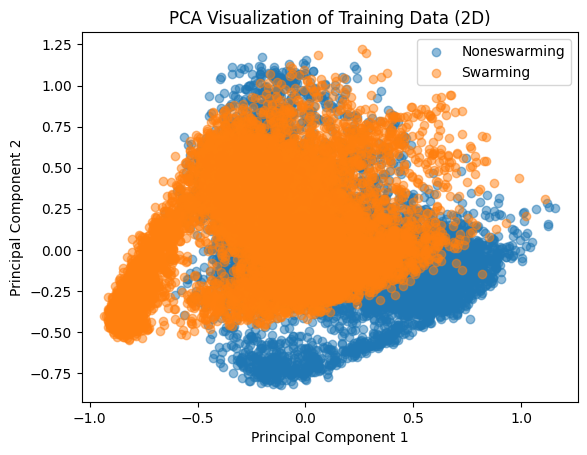

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality to 2 components for each set
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

# Create a scatter plot of the first two principal components for training set
plt.scatter(X_train_pca[y_train == 0][:, 0], X_train_pca[y_train == 0][:, 1], label='Noneswarming', alpha=0.5)
plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], label='Swarming', alpha=0.5)

# Add labels and legend for the training set plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization of Training Data (2D)')
plt.show()



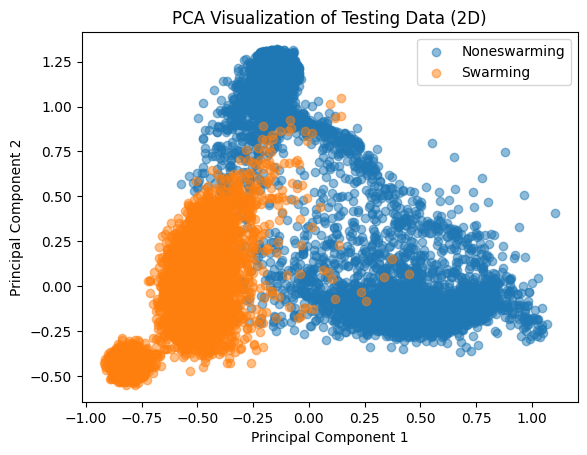

In [5]:
# Create a scatter plot of the first two principal components for testing set
plt.scatter(X_test_pca[y_test == 0][:, 0], X_test_pca[y_test == 0][:, 1], label='Noneswarming', alpha=0.5)
plt.scatter(X_test_pca[y_test == 1][:, 0], X_test_pca[y_test == 1][:, 1], label='Swarming', alpha=0.5)

# Add labels and legend for the testing set plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization of Testing Data (2D)')
plt.show()

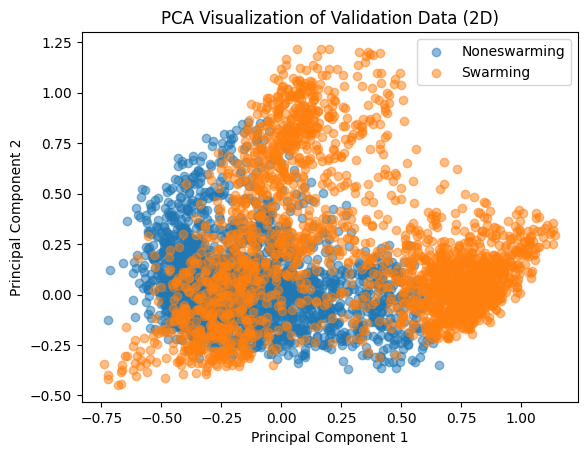

In [6]:
# Create a scatter plot of the first two principal components for validation set
plt.scatter(X_val_pca[y_val == 0][:, 0], X_val_pca[y_val == 0][:, 1], label='Noneswarming', alpha=0.5)
plt.scatter(X_val_pca[y_val == 1][:, 0], X_val_pca[y_val == 1][:, 1], label='Swarming', alpha=0.5)

# Add labels and legend for the validation set plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization of Validation Data (2D)')
plt.show()